In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Set student id

In [2]:
std_num = 9731089
r = 4

### Define `generate_circle_matrix(r)`
- **Purpose:** Generates a 2D matrix with a circle pattern.
- **Input:** `r` (radius, integer > 2)
- **Output:** 2D NumPy array with values of 255 inside the circle.

In [6]:
def generate_circle_matrix(r):
    """
    Generates a 2D NumPy matrix with a circle pattern.
    
    Parameters:
    - r (int): The radius of the circle. Should be larger than 2.
    
    Behavior:
    1. Checks the validity of the input radius; it should be greater than 2.
    2. Decrements the radius by 1 to match the zero-based indexing.
    3. Initializes a 2D NumPy matrix with dimensions \((2r+1) \times (2r+1)\).
    4. Populates the matrix using the following rule:
        - The value at position \((i, j)\) is set to 255 if the point lies within the circle,
          and to 0 otherwise.
    
    Returns:
    - 2D NumPy array: A matrix representing the circle pattern, with 255 for points inside the circle
      and 0 for points outside.
    """
    # Check the validity of the input radius
    if r < 3:
        print('r should be larger than 2')
        return
    r -= 1
    matrix = np.fromfunction(lambda i, j: 255*((i-r)**2 + (j-r)**2 <= r**2), shape=(2*r+1,2*r+1), dtype=np.int8)
    return matrix

In [7]:
circle_matrix = generate_circle_matrix(4)

In [8]:
circle_matrix

array([[  0,   0,   0, 255,   0,   0,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [255, 255, 255, 255, 255, 255, 255],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0, 255, 255, 255, 255, 255,   0],
       [  0,   0,   0, 255,   0,   0,   0]])

### Define `add_noise(_matrix, high_noise)`
- **Purpose:** Adds random noise to a 2D matrix.
- **Input:** `_matrix` (2D array), `high_noise` (noise upper limit)
- **Output:** 2D NumPy array with added noise.

In [8]:
def add_noise(_matrix, high_noise):
    """
    Adds random noise to a given 2D NumPy matrix.
    
    Parameters:
    - _matrix (np.ndarray): The input 2D matrix to which noise will be added.
    - high_noise (float): The upper limit for the random noise to be generated.
    
    Behavior:
    1. Generates a 2D matrix of random noises, with the same shape as the input matrix, 
       where each value is between 0 and 'high_noise'.
    2. Multiplies the generated noise by -1 for the positions where the original matrix has a value of 255.
    3. Adds the adjusted noise to the original matrix.
    4. Floors the values in the resulting matrix and converts it to the same data type as the input matrix.
    
    Returns:
    - 2D NumPy array: A matrix with random noise added to the original values.
    """
    # Generate noises
    noises = np.random.uniform(0, high_noise, size=_matrix.shape)
    # Multipy noise in -1 for 255 values
    adjusted_noises = np.where(_matrix != 0, noises*(-1), noises)
    # Add noises to the original matrix
    noisy_matrix = np.add(_matrix, adjusted_noises)
    # Calc the floor of the values
    res = np.floor(noisy_matrix).astype(_matrix.dtype)
    return res

In [9]:
std_str = str(std_num)
std_digits_sum = sum(list(map(int, std_str.strip())))

In [10]:
std_digits_sum

37

In [11]:
noisy_matrix = add_noise(circle_matrix, (std_digits_sum % 15) + 20)

In [12]:
noisy_matrix

array([[ 17,   0,  13, 253,   6,  17,  15],
       [ 13, 241, 231, 243, 239, 240,   9],
       [ 21, 240, 242, 242, 249, 228,  26],
       [254, 241, 247, 230, 230, 232, 233],
       [  5, 245, 239, 248, 251, 237,  11],
       [  8, 237, 248, 252, 228, 242,   3],
       [  2,  25,   3, 250,  16,  14,  15]])

### Visualize and compare the original and noisy circle matrices.

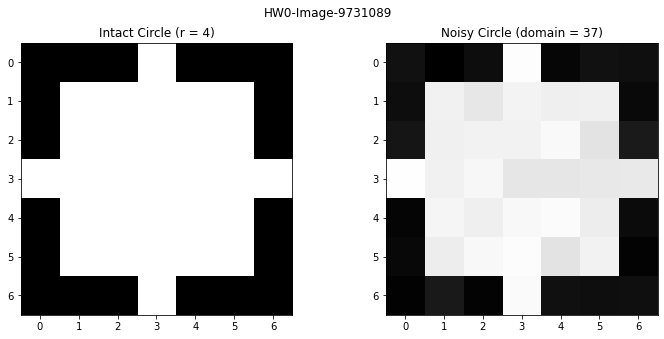

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
fig.suptitle(f'HW0-Image-{std_num}')
ax[0].set_title(f'Intact Circle (r = {r})')
ax[0].imshow(circle_matrix, cmap='gray')

ax[1].set_title(f'Noisy Circle (domain = {std_digits_sum})')
ax[1].imshow(noisy_matrix, cmap='gray', vmin = 0, vmax = 255)
plt.show()

### Visualize and compare the original and noisy circle matrices in a 3D style.

In [20]:
from mpl_toolkits import mplot3d

In [22]:
%matplotlib inline

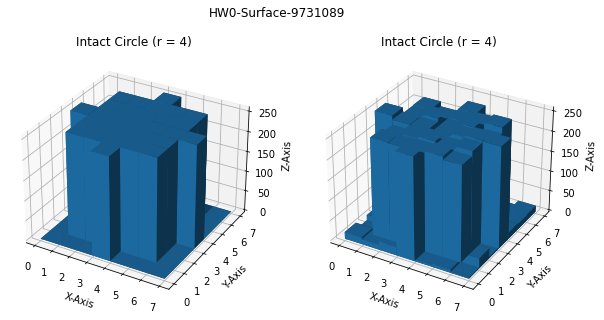

In [121]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure(figsize=(10, 5))
fig.suptitle(f'HW0-Surface-{std_num}')
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title(f'Intact Circle (r = {r})')

A = circle_matrix
first_dim = A.shape[0]
second_dim = A.shape[1]

x = np.array([[i] * second_dim for i in range(first_dim)]).ravel() # x coordinates of each bar
y = np.array([i for i in range(second_dim)] * first_dim) # y coordinates of each bar
z = np.zeros(first_dim*second_dim) # z coordinates of each bar
dx = np.ones(first_dim*second_dim) # length along x-axis of each bar
dy = np.ones(first_dim*second_dim) # length along y-axis of each bar
dz = A.ravel() # length along z-axis of each bar (height)

ax.bar3d(x, y, z, dx, dy, dz)

# Labels
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')

ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title(f'Intact Circle (r = {r})')

A = noisy_matrix
first_dim = A.shape[0]
second_dim = A.shape[1]

x = np.array([[i] * second_dim for i in range(first_dim)]).ravel() # x coordinates of each bar
y = np.array([i for i in range(second_dim)] * first_dim) # y coordinates of each bar
z = np.zeros(first_dim*second_dim) # z coordinates of each bar
dx = np.ones(first_dim*second_dim) # length along x-axis of each bar
dy = np.ones(first_dim*second_dim) # length along y-axis of each bar
dz = A.ravel() # length along z-axis of each bar (height)

ax.bar3d(x, y, z, dx, dy, dz)

# Labels
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')

plt.show()

Text(0.5, 0, 'Z-Axis')

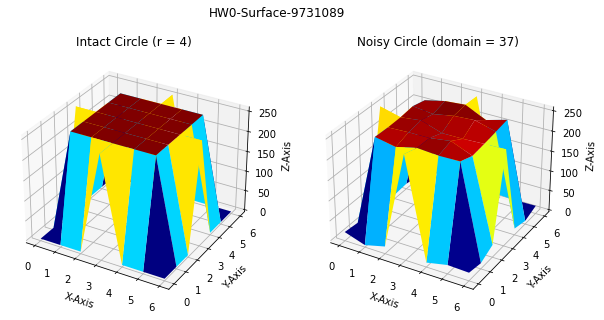

In [115]:
# Import Libraries

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 3D Projection
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=(10, 5))
fig.suptitle(f'HW0-Surface-{std_num}')

# 3D Projection
ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.set_title(f'Intact Circle (r = {r})')

# Surface Plot
z1 = circle_matrix
x_2d_1, y_2d_1 = np.meshgrid(range(z1.shape[0]), range(z1.shape[1]))
surf = ax.plot_surface(x_2d_1, y_2d_1, z1, cmap=cm.jet)

# Labels
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')

# 3D Projection
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.set_title(f'Noisy Circle (domain = {std_digits_sum})')

# Surface Plot
z2 = noisy_matrix
x_2d_2, y_2d_2 = np.meshgrid(range(z2.shape[0]), range(z2.shape[1]))
ax.plot_surface(x_2d_2, y_2d_2, z2, cmap=cm.jet)

# Labels
ax.set_xlabel('X-Axis')
ax.set_ylabel('Y-Axis')
ax.set_zlabel('Z-Axis')